# 2.1 A numerical implementation

## Question 2.8

The discretized form of the Bellman equation for every $w^k$ is

$$\hat{V}_t(w^k) =\max_{\left\{ \text{accept, reject}\right\} }\left\{
w^k\frac{1-\beta^{T-t+1}}{1-\beta} ,c+\beta \sum_{k'=0}^{K}\hat{V}_{t+1}(w^{k'})\hat{f}^{k'} \right\} ,$$

Implementation:

In [1]:
%matplotlib inline   
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

def finitebellman(w_grid,f_grid,c,β,T):
    V = np.zeros(len(w_grid)*(T+1))
    V.shape = (len(w_grid),T+1)
    
    i = 0
    while i < (len(w_grid)):
        if w_grid[i] > c:
            V[i,T] = w_grid[i]
        else:
            V[i,T] = c
        i = i + 1
    
    t=T-1
    wt = np.zeros((T+1))
    wt[T] = c
    while t > -1:
        x = 0
        s = 0
        while x < (len(w_grid)):
            s = s + V[x,t+1]*f_grid[x]
            x = x + 1
        wt[t] = (c + β*s)*(1-β)/(1-β**(T-t+1))
        i=0
        while i < (len(w_grid)):
            if w_grid[i] > wt[t]:
                V[i,t] = w_grid[i]*(1-β**(T-t+1))/(1-β)
            else:
                V[i,t] = wt[t]*(1-β**(T-t+1))/(1-β)
            i = i+1
        
        t = t - 1
    
    return wt

## Question 2.9

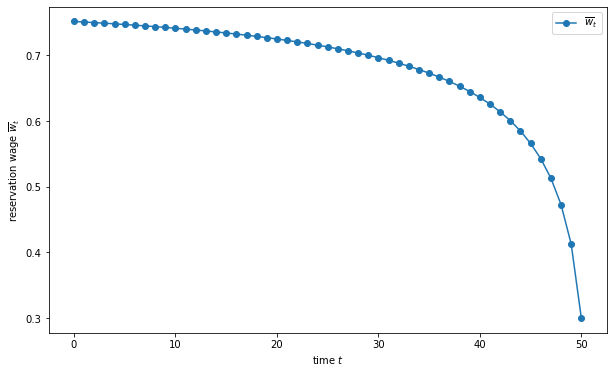

In [2]:
T = 50
β = 0.97
c = 0.3
B = 1
K = 1000
w_grid = np.linspace(0,B,K+1)
a, b = (0 - 0.5) / (0.1**0.5), (B - 0.5) / (0.1**0.5)
f_grid = np.zeros(K+1)
f_grid[0] = sp.truncnorm.cdf((w_grid[1]/(2)),a,b,loc = 0.5,scale=0.1**0.5)
e=1
while e < K:
    f_grid[e] = sp.truncnorm.cdf((w_grid[e]+w_grid[e+1])/2,a,b,loc = 0.5,scale=0.1**0.5)-sp.truncnorm.cdf((w_grid[e]+w_grid[e-1])/2,a,b,loc = 0.5,scale=0.1**0.5)
    e = e + 1
f_grid[K] = 1 - sp.truncnorm.cdf((w_grid[K]+w_grid[K-1])/2,a,b,loc = 0.5,scale=0.1**0.5)

wt = finitebellman(w_grid=w_grid,f_grid=f_grid,c=c,β=β,T=T)

t = np.zeros((T+1))
i = 0
while i < T+1:
    t[i]=i
    i = i + 1
fig, ax = plt.subplots()                                  
ax.plot(t, wt, '-o', label='$\overline{w}_t$')              
ax.set(xlabel='time $t$',ylabel='reservation wage $\overline{w}_t$')
ax.legend()                                                
plt.show()                                           

## Question 2.10

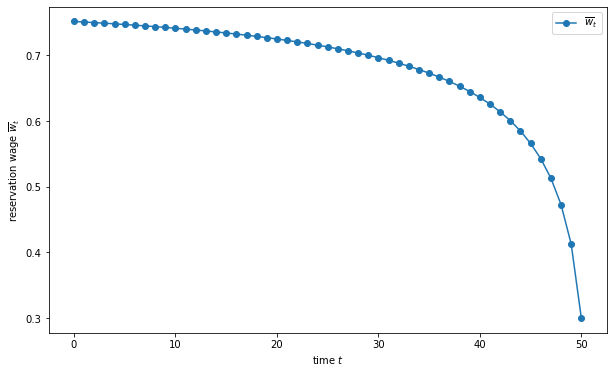

In [3]:
wbar = np.zeros((T+1))
wbar[T] = c
t=T-1
while t > -1:
    i=0
    VV = 0
    while i < (len(w_grid)):
        if w_grid[i] < wbar[t+1]:
            VV = VV + wbar[t+1]*f_grid[i]
        else:
            VV = VV + w_grid[i]*f_grid[i]
        i = i+1
    wbar[t]=((1-β)/(1-β**(T-t+1)))*(c+β*((1-β**(T-t))/(1-β))*VV)
    t = t-1
t = np.zeros((T+1))
i = 0
while i < T+1:
    t[i]=i
    i = i + 1
fig, ax = plt.subplots()                                  
ax.plot(t, wbar, '-o', label='$\overline{w}_t$')              
ax.set(xlabel='time $t$',ylabel='reservation wage $\overline{w}_t$')
ax.legend()                                                
plt.show()

In order to compare the two results, I plot them and their difference. Clearly, the two results are the same.

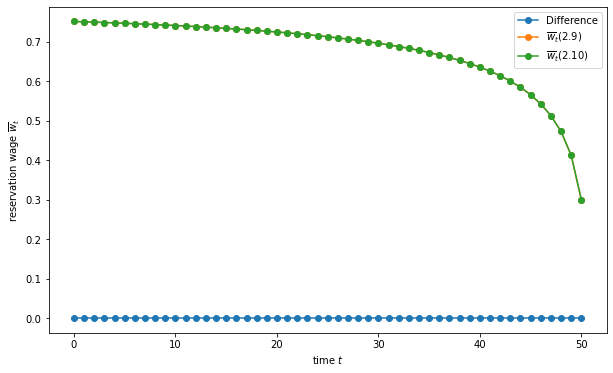

In [4]:
dif = wt - wbar
fig, ax = plt.subplots()                                  
ax.plot(t, dif, '-o', label='Difference') 
ax.plot(t, wt, '-o', label='$\overline{w}_t(2.9)$')  
ax.plot(t, wbar, '-o', label='$\overline{w}_t(2.10)$')  
ax.set(xlabel='time $t$',ylabel='reservation wage $\overline{w}_t$')
ax.legend()                                                
plt.show()

## Question 2.11

Let's first visualize the two distributions and then visualize and compare the resulted reservation wage for these distributions.

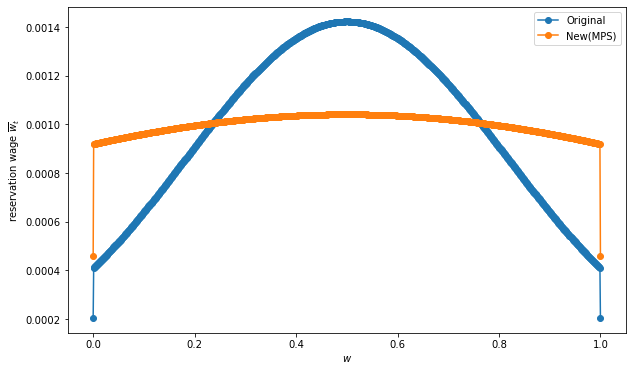

In [5]:
c, d = (0 - 0.5) / 1, (B - 0.5) / 1
g_grid = np.zeros(K+1)
g_grid[0] = sp.truncnorm.cdf((w_grid[1]/(2)),c,d,loc = 0.5,scale=1)
e=1
while e < K:
    g_grid[e] = sp.truncnorm.cdf((w_grid[e]+w_grid[e+1])/2,c,d,loc = 0.5,scale=1)-sp.truncnorm.cdf((w_grid[e]+w_grid[e-1])/2,c,d,loc = 0.5,scale=1)
    e = e + 1
g_grid[K] = 1 - sp.truncnorm.cdf((w_grid[K]+w_grid[K-1])/2,c,d,loc = 0.5,scale=1)


fig, ax = plt.subplots()                                  
ax.plot(w_grid, f_grid, '-o', label='Original')
ax.plot(w_grid, g_grid, '-o', label='New(MPS)')  
ax.set(xlabel='$w$',ylabel='reservation wage $\overline{w}_t$')
ax.legend()                                                
plt.show()

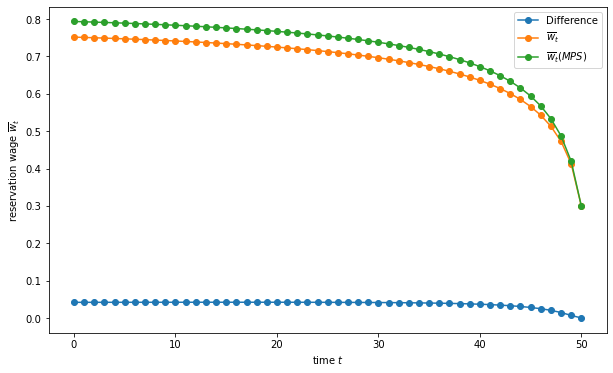

In [6]:
c = 0.3
mps = np.zeros((T+1))
mps[T] = c
t = np.zeros((T+1))
t=T-1
while t > -1:
    i=0
    VV = 0
    while i < (len(w_grid)):
        if w_grid[i] < mps[t+1]:
            VV = VV + mps[t+1]*g_grid[i]
        else:
            VV = VV + w_grid[i]*g_grid[i]
        i = i+1
    mps[t]=((1-β)/(1-β**(T-t+1)))*(c+β*((1-β**(T-t))/(1-β))*VV)
    t = t-1
t = np.zeros((T+1))
i = 0
while i < T+1:
    t[i]=i
    i = i + 1
dif = mps - wt
fig, ax = plt.subplots()                                  
ax.plot(t, dif, '-o', label='Difference') 
ax.plot(t, wt, '-o', label='$\overline{w}_t$')  
ax.plot(t, mps, '-o', label='$\overline{w}_t(MPS)$')  
ax.set(xlabel='time $t$',ylabel='reservation wage $\overline{w}_t$')
ax.legend()                                                
plt.show()

Clearly, for any $t$ other than $T$, $\overline{w}_t$ from the new distribution is strictly bigger than $\overline{w}_t$; for $t=T$, $\overline{w}_t$ are the same. This result means that agents are more willing to wait and the threshold to stop waiting is higher with a more votatile distribution of potential wage offers.

Firstly, we can use our intuition. The option to wait basically makes the agent indifferent from bad and terrible offers (both below $\overline{w}_t$) so that the downside risk from MPS has no impact. At the same time, MPS strictly increases the wage for good offers (those above $\overline{w}_t$). Thus, MPS strictly increases $E[V_t]$, for any $t<T$, and, thus, strictly increases $\overline{w}_t$. In other words, agents are more willing to wait because there are more good offers out there in the possible future.

Secondly, we can view unemployment as an option to buy the asset of wage offer. An option's value increases with the volatility of the underlying asset, so unemployment is more valuable when offers are more volatile. Thus, $\overline{w}_t$ is bigger. This is essentially relating to a known conclusion in finance.

Thirdly, we can view it from a pure theoratical / mathematical point of view. This draws on our last homework. Similar process can be done here to strictly prove that $\overline{w}_t$ is increased from MPS. Because we are only asked to explain with theoretical insights, I will not do it here. The remaining stuff is pretty much similar to the first reasoning. The only difference may be that in last homework we prove from $\overline{w}_t$ to $E[V_t]$, but I reverse the process in the first intuitive reasoning.